## Visualize spatial soil moisture at TRAM harvest site 1 (2021, doy 123-126 average)
### Samuli Launiainen 24.3.2022

### Import modules

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio
#from rasterio.plot import show
import os
from pathlib import Path
import numpy as np
#from PIL import Image
from raster_utils import read_pkrasteri_for_extent


## Read SpaFHy results:  
  
Average Saturation Deficit (SatDef) during harvest operation. SatDef is hydrologically adjusted TWI, goes to zero where ground water is at the surface. The domain consists of several sub-catchments modeled independently; results merged to large netCDF-file and then exported to AsciiGrid-format

In [22]:
f = r"C:\Projects\TRAM\spafhy_results\combined\site1_sat_deficit_doy_123_126.asc"

s = rasterio.open(f, 'r')
print(s.meta)
print(s.bounds)
# bbox to read peruskarttarasteri for extent of ascii-grids
bbox = s.bounds
#print(bbox)
satdef = s.read()
#satdef[satdef==-9999] = np.NaN

# read nodata mask --> set values outside sub-cathcments to zero.
smask = s.read_masks(1)
smask = smask / 255
smask[np.where(smask==0)] = np.NaN
#s.close()

{'driver': 'AAIGrid', 'dtype': 'float32', 'nodata': -9999.0, 'width': 68, 'height': 58, 'count': 1, 'crs': None, 'transform': Affine(16.0, 0.0, 340448.0,
       0.0, -16.0, 6692992.0)}
BoundingBox(left=340448.0, bottom=6692064.0, right=341536.0, top=6692992.0)


## Read vol. moisture

In [23]:
f = r"C:\Projects\TRAM\spafhy_results\combined\site1_vol_moisture_doy_123_126.asc"

v = rasterio.open(f, 'r')
print(v.meta)
print(v.bounds)
# bbox to read peruskarttarasteri for extent of ascii-grids
bbox = v.bounds
#print(bbox)
wliq = v.read()
#wliq[wliq==-9999] = np.NaN
# read nodata mask
wmask = v.read_masks(1)
wmask = wmask / 255
#print(np.unique(wmask))
wmask[np.where(wmask==0)] = np.NaN
#s.close()

{'driver': 'AAIGrid', 'dtype': 'float32', 'nodata': -9999.0, 'width': 68, 'height': 58, 'count': 1, 'crs': None, 'transform': Affine(16.0, 0.0, 340448.0,
       0.0, -16.0, 6692992.0)}
BoundingBox(left=340448.0, bottom=6692064.0, right=341536.0, top=6692992.0)


## Read Peruskartta geotiff and plot raster overlays.  
See RasterProcessing -notebook how singleband pk-tiff was created. Note: needs tweak'ing to plot colorbar.  

Note Vol. moisture outsize forest incorrect; need to fix LAI and vegetation parameters.

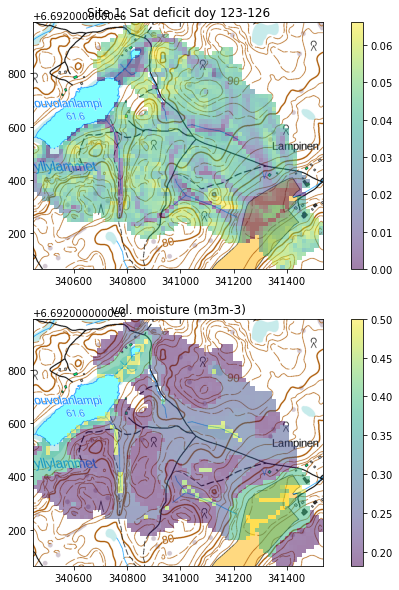

In [24]:
# read peruskarttarasteri
f = r"c:\projects\tram\data\pkrasteri\L4123L.tif"

pk, meta = read_pkrasteri_for_extent(f, bbox, showfig=False)

# show raster overlays
plt.close('all')

fig1, ax1 = plt.subplots(2,1, figsize=(10,10))
rasterio.plot.show(pk, transform=meta['transform'], ax=ax1[0])

rr = rasterio.plot.show(satdef * smask, transform=s.transform, ax=ax1[0], alpha=0.5)
# this creates colorbar
im = rr.get_images()[1]
ax1[0].set_title('Site 1: Sat deficit doy 123-126')
fig1.colorbar(im, ax=ax1[0], shrink=1)

rasterio.plot.show(pk, transform=meta['transform'], ax=ax1[1]);
#show(twi * mask, transform=r.transform, ax=ax1, alpha=0.5, vmin=5., vmax=10.0)
rr = rasterio.plot.show(wliq * wmask, transform=v.transform, ax=ax1[1], alpha=0.5)
im = rr.get_images()[1]
ax1[1].set_title('vol. moisture (m3m-3)')
fig1.colorbar(im, ax=ax1[1], shrink=1)
plt.show()

fig1.savefig('Site1_moisture.png', dpi=300)

## Close rasterfiles

In [26]:

v.close()
s.close()